## 通し課題
### kaggle: kickstarter

データ : ks-projects-201801  
問題 : 目的変数をstateとする分類  
URL : https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
# 各種ライブラリーインポート
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# データ読み込み
df = pd.read_csv('../../../data/kickstarter/ks-projects-201801.csv')

In [3]:
# データの先頭5件のデータ確認
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# データの基本的な情報確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
# データの基礎集計(int/float型のみ)
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
# 欠損値確認
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

| 変数名 | 変数の意味 |
| ----- | ---------- |
| ID	| KICKSTARTER上で管理するための番号 |
| name  | 	プロジェクト名 |
| category | 	第2カテゴリー(下記main_categoryで分けられた分類をさらに細分化するためのカテゴリー)  |
| main_category | 	第1カテゴリー  |
| currency	| 募集した通貨の単位  |
| deadline	| 支援金の公募期間の締切日  |
| goal	| 目標公募金額  |
| launched	| 支援金の公募期間の開始日  |
| pledged	| 公募された金額  |
| state	| プロジェクトの資金調達が目標額に到達したかどうかの成功可否  |
| backers	| 支援者数  |
| country	| どの国のプロジェクトか |
| usd pledged	| KICKSTARTER運営側がドル換算した、公募された金額 |
| usd_pledged_real	| Fixer.io APIを利用してドル換算した、公募された金額 |
| usd_goal_real	| Fixer.io APIを利用してドル換算した、目標公募金額 |

削除対象
- ID
- pledged
- usd pledged
- usd
- backers

---------------------
1. 目的変数(state)の処理
---------------------

In [7]:
# 目的変数のカテゴリ確認
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

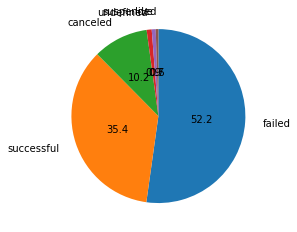

In [8]:
# 目的変数のカテゴリの割合
# plt.pieの各オプション:
# counterclock: データを時計回りに入れる
# startangle: 1番最初のデータ開始位置 - 90は円の上から
# autopct: 構成割合のラベル表示
# pctdistance: 
# その他円グラフ：
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
plt.pie(df.state.value_counts() / df.state.value_counts().sum(),
        labels = df.state.value_counts().keys(),
        counterclock=False,
        startangle=90,
        autopct='%.1f', 
        pctdistance=0.5,
        labeldistance=1.2)
plt.show()

In [9]:
# 2種類(failed, successful)のみを抽出する
failed = df[df['state'] == 'failed']
successful = df[df['state'] == 'successful']
new_df = pd.concat([failed, successful],ignore_index=True)
# 検算
print(new_df['state'].value_counts())
print(new_df['state'].value_counts().sum())

failed        197719
successful    133956
Name: state, dtype: int64
331675


In [10]:
# failed: 0, successful: 1
new_df.loc[new_df['state'] == 'failed', 'state'] = 0
new_df.loc[new_df['state'] == 'successful', 'state'] = 1
# 確認
print(new_df['state'].value_counts())
print(new_df['state'].value_counts().sum())

0    197719
1    133956
Name: state, dtype: int64
331675


In [11]:
# float型に変換
new_df['state'] = new_df['state'].astype('float')
# 確認
print(type(new_df['state'][0]))

<class 'numpy.float64'>


In [12]:
# dataframe確認
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 15 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null float64
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 38.0+ MB


-------------------------------
### 2. main_category列の処理
-------------------------------

In [13]:
# カテゴリの種類
category = new_df['category'].value_counts()
main_category = new_df['main_category'].value_counts()
print('category数      :{}'.format(len(category)))
print('main_category数 :{}'.format(len(main_category)))

category数      :159
main_category数 :15


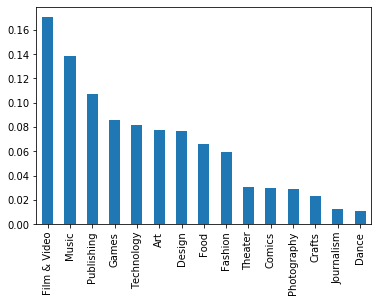

In [14]:
# メインカテゴリの種類と割合
main_category = new_df['main_category'].value_counts() / new_df['main_category'].value_counts().sum()
main_category.plot.bar()

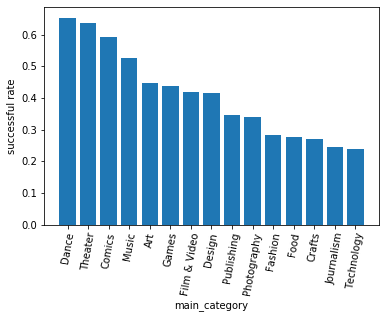

In [15]:
# カテゴリごとの成功率
successful_count = new_df.groupby(['main_category'])['state'].mean()
ranking = successful_count.sort_values(ascending=False)
plt.bar(ranking.index, ranking.values) # 棒グラフ
plt.xticks(rotation=80) # x軸回転
plt.xlabel('main_category') # x軸ラベル
plt.ylabel('successful rate') # y軸ラベル
# plt.ylim([0.0, 1.0]) # y軸スケール

plt.show()

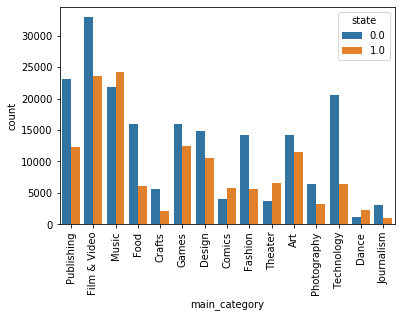

In [16]:
# 成功/失敗ごとにカウント表示
sns.countplot(data=new_df, x=new_df.main_category, hue=new_df.state)
plt.xticks(rotation=90)
plt.show()

In [17]:
# one-hot-encoding ダミー変数化
# One-hot-encorder(https://zerofromlight.com/blogs/detail/71/)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# reshapeで2次元配列に変換
enc.fit(new_df['main_category'].values.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [18]:
import category_encoders as ce

In [19]:
# one-hot-encoding ダミー変数化
# One-hot-encorder(https://zerofromlight.com/blogs/detail/71/)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# reshapeで2次元配列に変換
enc.fit(new_df['main_category'].values.reshape(-1,1))

# numpy配列として出力
arr = enc.transform(new_df['main_category'].values.reshape(-1,1))
print(arr[0,:]) # ダミー変数化できたか確認

# new_dfに代入
tmp_df = pd.DataFrame(arr, columns=enc.categories_[0])
new_df = pd.concat([new_df, tmp_df], axis=1)
# 確認
new_df.columns.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater'], dtype=object)

In [20]:
# 型確認(floatかどうか)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 30 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null float64
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Art                 331675 non-null float64
Comics              331675 non-null float64
Crafts              331675 non-null float64
Dance               331675 non-null float64
Design              331675 non-null float64
Fashion             

------------------------------------
### 3. currencyの処理
------------------------------------

In [21]:
# currencyのカラム確認
new_df['currency'].value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

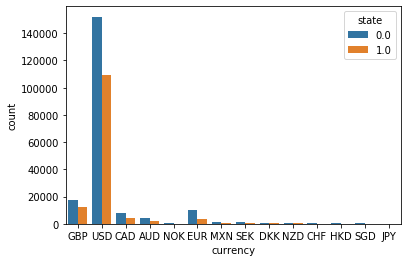

In [22]:
# 成功/失敗ごとにカウント表示
sns.countplot(x=new_df.currency,hue=new_df.state)

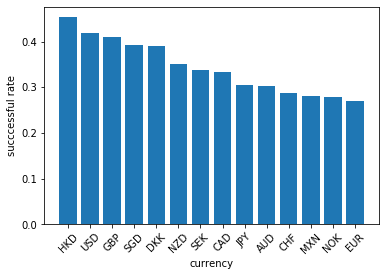

In [23]:
# 通貨ごとの成功率
ranking = new_df.groupby(['currency'])['state'].mean().sort_values(ascending=False)
plt.bar(ranking.index, ranking.values)
plt.xlabel('currency')
plt.ylabel('succcessful rate')
plt.xticks(rotation= 45)
# plt.ylim([0.0,1.0])
plt.show()

In [24]:
# One-hot-encode
enc = OneHotEncoder(sparse=False)

# reshapeで2次元配列に変換⇒One hot encode
# numpy配列として出力
arr = enc.fit_transform(new_df['currency'].values.reshape(-1,1))
print(arr[0])
print(enc.categories_)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
       'NOK', 'NZD', 'SEK', 'SGD', 'USD'], dtype=object)]


In [25]:
# new_dfに代入
tmp_df = pd.DataFrame(arr, columns=enc.categories_[0])
new_df = pd.concat([new_df, tmp_df], axis=1)

In [26]:
# 型確認
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 44 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null float64
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Art                 331675 non-null float64
Comics              331675 non-null float64
Crafts              331675 non-null float64
Dance               331675 non-null float64
Design              331675 non-null float64
Fashion             

-------------------------------
### 4. goal列の処理
-------------------------------

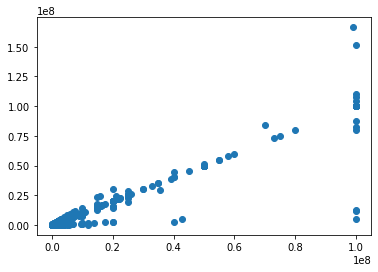

In [27]:
# goal - usd_goal_realとの関係
plt.scatter(new_df['goal'], new_df['usd_goal_real'])
plt.show()

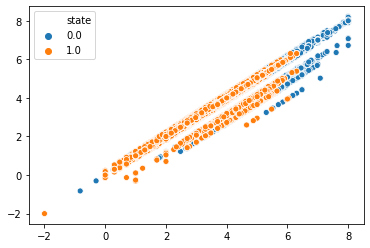

In [28]:
# goal - usd_goal_realとの関係
sns.scatterplot(np.log10(new_df['goal'].values), np.log10(new_df['usd_goal_real'].values), hue=new_df['state'])
plt.show()

In [29]:
# goalとusd_goal_realはどちらか一方で良さそうなのでgoal列を使ってみる
# 統計情報確認
new_df['goal'].describe()

count    3.316750e+05
mean     4.425157e+04
std      1.117917e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [30]:
# goalの上位10
new_df['goal'].sort_values(ascending=False)[:10]

83422     100000000.0
28638     100000000.0
37883     100000000.0
135149    100000000.0
17212     100000000.0
40443     100000000.0
102382    100000000.0
193943    100000000.0
61549     100000000.0
176716    100000000.0
Name: goal, dtype: float64

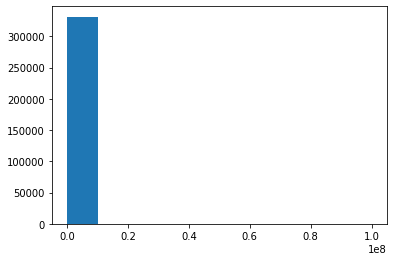

In [31]:
# goalのグラフ
plt.hist(new_df['goal'])
plt.show()

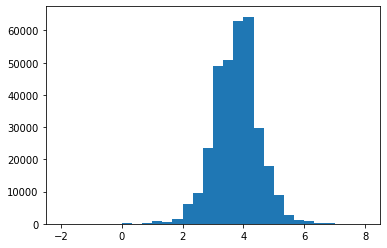

In [32]:
# 各値が大きすぎるので対数log_10で変換
plt.hist(np.log10(new_df['goal'].values), bins=30)
plt.show()

In [33]:
# 標準化する
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() # インスタンス生成
log10_goal_stdsc = stdsc.fit_transform(np.log10(new_df['goal'].values.reshape(-1,1)))
# 標準化の確認
print(log10_goal_stdsc.mean())
print(log10_goal_stdsc.std())

-6.306890221083093e-16
1.0


In [34]:
# new_dfに列追加
new_df['goal_stdsc'] = log10_goal_stdsc
new_df['goal_stdsc']

0        -0.988637
1         1.011062
2         1.249451
3        -0.042385
4         0.903868
            ...   
331670   -0.988637
331671   -0.252088
331672   -1.018794
331673   -0.042385
331674    0.772673
Name: goal_stdsc, Length: 331675, dtype: float64

In [35]:
# 確認
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 45 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null float64
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
Art                 331675 non-null float64
Comics              331675 non-null float64
Crafts              331675 non-null float64
Dance               331675 non-null float64
Design              331675 non-null float64
Fashion             

-------------------------------------
### 5. launched & deadlineの処理
-------------------------------------

In [36]:
# 型確認
print(type(new_df['deadline'][0]))
print(type(new_df['launched'][0]))

<class 'str'>
<class 'str'>


In [37]:
# date型へ変換
deadline = pd.to_datetime(new_df['deadline'],format='%Y-%m-%d')
launched = pd.to_datetime(new_df['launched'], format='%Y-%m-%d').dt.floor('D') # 日付で切り捨て
launched

0        2015-08-11
1        2017-09-02
2        2013-01-12
3        2012-03-17
4        2016-02-01
            ...    
331670   2017-10-04
331671   2015-11-23
331672   2013-10-18
331673   2014-02-20
331674   2015-03-29
Name: launched, Length: 331675, dtype: datetime64[ns]

In [38]:
# 期間算出
period = deadline - launched
period

0        59 days
1        60 days
2        45 days
3        30 days
4        45 days
           ...  
331670   27 days
331671   22 days
331672   43 days
331673   30 days
331674   30 days
Length: 331675, dtype: timedelta64[ns]

In [39]:
# timedelta64 to int ⇒ floatに変換
period = period.dt.days.astype('float')
# 型確認
new_df['period'] = period
print(type(period[0]))

<class 'numpy.float64'>


In [40]:
# 統計情報確認
period.describe()

count    331675.000000
mean         33.954875
std          12.713332
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
dtype: float64

In [41]:
# 標準化する
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() # インスタンス生成
period_stdsc = stdsc.fit_transform(period.values.reshape(-1,1))
# 列追加
new_df['period_sdsc'] = period_stdsc

In [42]:
# # 標準化しない場合
# new_df['period'] = period

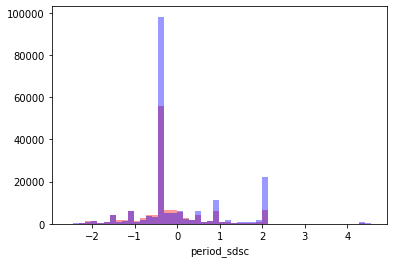

In [43]:
# successfulとfaildの可視化
successful = new_df[new_df['state'] == 1.0]['period_sdsc']
failed = new_df[new_df['state'] == 0.0]['period_sdsc']
# successful = new_df[new_df['state'] == 1.0]['period']
# failed = new_df[new_df['state'] == 0.0]['period']
sns.distplot(successful, color='red', kde=False)
sns.distplot(failed, color='blue',kde=False)
plt.show()

----------------------------
### 8. 不要な列の削除
----------------------------

In [44]:
# 列一覧表示
new_df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art', 'Comics',
       'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
       'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
       'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY',
       'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'goal_stdsc', 'period',
       'period_sdsc'],
      dtype='object')

In [45]:
# 削除するカラムリスト作成
drop_colums = [
    'ID', 'name', 'category', 'main_category', 'currency', 'deadline',
    'goal', 'launched', 'pledged', 
#     'state', 
    'backers', 'country',
    'usd pledged', 'usd_pledged_real', 'usd_goal_real', 
#     'Art', 'Comics',
#     'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
#     'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
#     'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY',
#     'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 
#     'goal_stdsc', 'period','period_sdsc'
              ]

In [46]:
# 入力データXと正解データyの作成
# y = new_df['state'].values # 正解データ
X = new_df.drop(columns=drop_colums) # 入力データ

In [47]:
# 入力データ確認
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 33 columns):
state           331675 non-null float64
Art             331675 non-null float64
Comics          331675 non-null float64
Crafts          331675 non-null float64
Dance           331675 non-null float64
Design          331675 non-null float64
Fashion         331675 non-null float64
Film & Video    331675 non-null float64
Food            331675 non-null float64
Games           331675 non-null float64
Journalism      331675 non-null float64
Music           331675 non-null float64
Photography     331675 non-null float64
Publishing      331675 non-null float64
Technology      331675 non-null float64
Theater         331675 non-null float64
AUD             331675 non-null float64
CAD             331675 non-null float64
CHF             331675 non-null float64
DKK             331675 non-null float64
EUR             331675 non-null float64
GBP             331675 non-null float64
HKD      

In [48]:
# データの一時保存
data = new_df.drop(columns=drop_colums)
new_df.to_pickle('./kickstarter_day1_df_after_preproccessed.pkl')

----------------------------------
### 9.0 予測モデル構築
----------------------------------

In [49]:
# 予測モデルのライブラリインポート
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
# データの分割
train_X, test_X = train_test_split(X, test_size = 0.3, random_state=9999)
# 目的変数の作成
train_y = train_X['state']
test_y = test_X['state']
# 入力データの作成
train_X = train_X.drop(['state'], axis=1)
test_X = test_X.drop(['state'],axis=1)
print(train_X.columns)
print(test_X.columns)

Index(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP',
       'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'goal_stdsc',
       'period', 'period_sdsc'],
      dtype='object')
Index(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP',
       'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'goal_stdsc',
       'period', 'period_sdsc'],
      dtype='object')


In [51]:
# 予測モデル作成
lr = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
# 学習
lr.fit(train_X, train_y)
# 予測
y_est = lr.predict(test_X)
y_est_learn = lr.predict(train_X)
# 予測精度
print('学習データに対する精度: {:.2f}%'.format(metrics.accuracy_score(train_y, y_est_learn)*100))
print('予測精度: {:.2f}%'.format(metrics.accuracy_score(test_y, y_est)*100))

学習データに対する精度: 64.85%
予測精度: 64.97%


In [52]:
# 各学習した係数の表示
columns = train_X.columns
for idx, value in enumerate(lr.coef_[0]):
    print('{} : {}'.format(columns[idx], value))

Art : 0.013133604699297684
Comics : 0.6816701969578419
Crafts : -0.8746729612944035
Dance : 0.9829516633481991
Design : 0.2449290392291088
Fashion : -0.5232584977055156
Film & Video : 0.16128246289910997
Food : -0.4607553554657255
Games : 0.24911539013589876
Journalism : -0.7477179533623411
Music : 0.4721465993829069
Photography : -0.3709658053072537
Publishing : -0.2816954194401791
Technology : -0.4193681183408346
Theater : 0.8850729354659723
AUD : -0.3881219397928145
CAD : -0.26228445622451924
CHF : -0.14742575783229991
DKK : 0.467601072324448
EUR : -0.49062162966214756
GBP : -0.2140216925359837
HKD : 0.836598105443689
JPY : 0.06367412758319013
MXN : 0.04596338737330144
NOK : 0.00028566336085929895
NZD : -0.28538370078033937
SEK : 0.20522002321588256
SGD : 0.16630431030391002
USD : 0.01408026842435808
goal_stdsc : -0.45271260095755794
period : -0.012572614600107578
period_sdsc : -0.032685550002169717


In [53]:
sort_coef = np.sort(lr.coef_[0])[::-1] # 降順に並べ替え
sort_idx = np.argsort(lr.coef_[0])[::-1] # 並べ変えたインデックスを取得

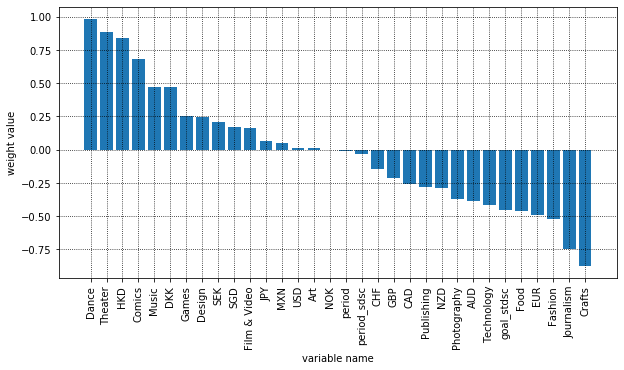

In [54]:
# 学習した係数のランキング
plt.figure(figsize=(10,5))
plt.bar(columns[sort_idx], sort_coef)
plt.grid()
plt.grid(which='major', color='black',linestyle=':')
plt.grid(which='minor', color='black',linestyle=':')
plt.xticks(rotation = 90)
plt.xlabel('variable name')
plt.ylabel('weight value')
plt.show()

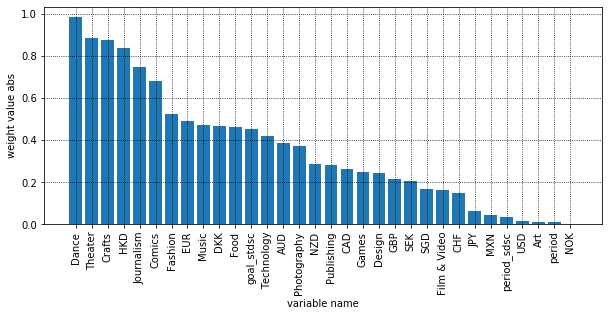

In [55]:
# 絶対値でソート
sort_abs_coef = np.sort(abs(lr.coef_[0]))[::-1] # 降順に並べ替え
sort_abs_idx = np.argsort(abs(lr.coef_[0]))[::-1] # 並べ変えたインデックスを取得
# 学習した係数のランキング
plt.figure(figsize=(10,4))
plt.bar(columns[sort_abs_idx], sort_abs_coef)
plt.grid()
plt.grid(which='major', color='black',linestyle=':')
plt.grid(which='minor', color='black',linestyle=':')
plt.xticks(rotation = 90)
plt.xlabel('variable name')
plt.ylabel('weight value abs')
plt.show()

係数について
- main_category列の上位3つ　：　Dance, Crafts, Theater
- cuurency列の上位3つ ：　"HKD", "JPY", "EUR"
- goal_stdsc列もほどほどに高い
- main_categoryのいくつかはothersでまとめても良いかも

----------------------------------------------------------------------------------------------------------------------------------------

In [56]:
# new_dfコピー
new_df2 = new_df.copy() 

In [57]:
# weightの値が0.5以下を消してみる

min_value = 0.3

for idx, value in enumerate(sort_abs_coef):
    if value <= min_value :
#         print(idx, value)
        break
print('0.2以下のインデックス:{}～{}'.format(idx, len(sort_abs_coef)))
print(columns[sort_abs_idx][idx:])

0.2以下のインデックス:15～32
Index(['NZD', 'Publishing', 'CAD', 'Games', 'Design', 'GBP', 'SEK', 'SGD',
       'Film & Video', 'CHF', 'JPY', 'MXN', 'period_sdsc', 'USD', 'Art',
       'period', 'NOK'],
      dtype='object')


In [58]:
# main_categoryについて処理
# othersでまとめる
new_df2.loc[new_df2['main_category'].isin(['Publishing','Games','Design', 'Film & Video','Art']), 'main_category'] = 'category_others'
print('----------------------------')
print('■ main_category')
print('----------------------------')
print(new_df2['main_category'].value_counts())
# currencyについて処理
# othersでまとめる
new_df2.loc[new_df2['currency'].isin(['GBP', 'CHF', 'NOK', 'SEK', 'NOK','SGD', 'USD', 'MXN']), 'currency'] = 'currency_others'
print('----------------------------')
print('■ currency:')
print('----------------------------')
print(new_df2['currency'].value_counts())

----------------------------
■ main_category
----------------------------
category_others    171498
Music               45949
Technology          27050
Food                22054
Fashion             19775
Theater             10242
Comics               9878
Photography          9689
Crafts               7818
Journalism           4149
Dance                3573
Name: main_category, dtype: int64
----------------------------
■ currency:
----------------------------
currency_others    295598
EUR                 14378
CAD                 12375
AUD                  6621
NZD                  1274
DKK                   929
HKD                   477
JPY                    23
Name: currency, dtype: int64


In [59]:
# OnehotEncorder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
# reshapeで2次元配列に変換
enc.fit(new_df2['main_category'].values.reshape(-1,1))

# numpy配列として出力
arr = enc.transform(new_df2['main_category'].values.reshape(-1,1))
print(arr[0,:]) # ダミー変数化できたか確認

# new_dfに代入
tmp_df = pd.DataFrame(arr, columns=enc.categories_[0] + '_2')
new_df2 = pd.concat([new_df2, tmp_df], axis=1)
# 確認
new_df2.columns.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD',
       'USD', 'goal_stdsc', 'period', 'period_sdsc', 'Comics_2',
       'Crafts_2', 'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2',
       'Music_2', 'Photography_2', 'Technology_2', 'Theater_2',
       'category_others_2'], dtype=object)

In [60]:
# OnehotEncorder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
# reshapeで2次元配列に変換
enc.fit(new_df2['currency'].values.reshape(-1,1))

# numpy配列として出力
arr = enc.transform(new_df2['currency'].values.reshape(-1,1))
print(arr[0,:]) # ダミー変数化できたか確認

# new_dfに代入
tmp_df = pd.DataFrame(arr, columns=enc.categories_[0] + '_2')
new_df2 = pd.concat([new_df2, tmp_df], axis=1)
# 確認
new_df2.columns.values

[0. 0. 0. 0. 0. 0. 0. 1.]


array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD',
       'USD', 'goal_stdsc', 'period', 'period_sdsc', 'Comics_2',
       'Crafts_2', 'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2',
       'Music_2', 'Photography_2', 'Technology_2', 'Theater_2',
       'category_others_2', 'AUD_2', 'CAD_2', 'DKK_2', 'EUR_2', 'HKD_2',
       'JPY_2', 'NZD_2', 'currency_others_2'], dtype=object)

In [61]:
# 削除するカラム設定
drop_columns_2 = ['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 
#         'state', 
        'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD',
       'USD', 
#         'goal_stdsc', 'period_sdsc', 'Comics_2', 'Crafts_2',
#        'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2', 'Music_2',
#        'Photography_2', 'Technology_2', 'Theater_2', 
        'category_others_2',
#        'AUD_2', 'CAD_2', 'DKK_2', 'EUR_2', 'HKD_2', 'JPY_2', 'NZD_2',
        'currency_others_2'
                 ]
# 新しい入力データ
X_2 = new_df2.drop(columns=drop_columns_2,axis=1)
new_df2.to_pickle('./kickstarter_day1_df_after_preproccessed_dropcolumn.pkl')
X_2.columns

Index(['state', 'goal_stdsc', 'period', 'period_sdsc', 'Comics_2', 'Crafts_2',
       'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2', 'Music_2',
       'Photography_2', 'Technology_2', 'Theater_2', 'AUD_2', 'CAD_2', 'DKK_2',
       'EUR_2', 'HKD_2', 'JPY_2', 'NZD_2'],
      dtype='object')

In [62]:
# データの分割
train_X, test_X = train_test_split(X_2, test_size = 0.3, random_state=9999)
# 目的変数の作成
train_y = train_X['state']
test_y = test_X['state']
# 入力データの作成
train_X = train_X.drop(['state'], axis=1)
test_X = test_X.drop(['state'],axis=1)
print(train_X.columns)
print(test_X.columns)

Index(['goal_stdsc', 'period', 'period_sdsc', 'Comics_2', 'Crafts_2',
       'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2', 'Music_2',
       'Photography_2', 'Technology_2', 'Theater_2', 'AUD_2', 'CAD_2', 'DKK_2',
       'EUR_2', 'HKD_2', 'JPY_2', 'NZD_2'],
      dtype='object')
Index(['goal_stdsc', 'period', 'period_sdsc', 'Comics_2', 'Crafts_2',
       'Dance_2', 'Fashion_2', 'Food_2', 'Journalism_2', 'Music_2',
       'Photography_2', 'Technology_2', 'Theater_2', 'AUD_2', 'CAD_2', 'DKK_2',
       'EUR_2', 'HKD_2', 'JPY_2', 'NZD_2'],
      dtype='object')


In [63]:
# 予測モデル作成
lr2 = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=300)
# 学習
lr2.fit(train_X, train_y)
# 予測
y_est = lr2.predict(test_X)
y_est_learn = lr2.predict(train_X)
# 予測精度
print('学習データに対する精度: {:.2f}%'.format(metrics.accuracy_score(train_y, y_est_learn)*100))
print('予測精度: {:.2f}%'.format(metrics.accuracy_score(test_y, y_est)*100))

# 各学習した係数の表示
columns2 = train_X.columns
for idx, value in enumerate(lr2.coef_[0]):
    print('{} : {}'.format(columns[idx], value))

学習データに対する精度: 64.63%
予測精度: 64.66%
Art : -0.424774085837781
Comics : -0.01087461417566188
Crafts : -0.05421902590908307
Dance : 0.6139717994095139
Design : -0.9348139015420377
Fashion : 0.8797530803652549
Film & Video : -0.603363336358757
Food : -0.5253512509981163
Games : -0.8017203208116296
Journalism : 0.41307159449137454
Music : -0.44126781608456755
Photography : -0.5049033756550255
Publishing : 0.7977498852874221
Technology : -0.36818516716145044
Theater : -0.25040994874613165
AUD : 0.4296718545895252
CAD : -0.4513363828042007
CHF : 0.6814029560711334
DKK : 0.03987208691342575
EUR : -0.27210148596741307


In [64]:
# Precision, Recall, F1-scoreを計算
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
precision, recall, f1_score, _ = precision_recall_fscore_support(test_y, y_est)

# Precision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

適合率（Precision） = 59.565%
再現率（Recall） = 39.088%
F1値（F1-score） = 47.201%


In [65]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(test_y, y_est)
conf_mat = pd.DataFrame(conf_mat#, 
                        # index=['正解 = failed', '正解 = successful'], 
                        # columns=['予測 = failed', '予測 = successful']
                        )
conf_mat

,0,1
0,48621,10670
1,24494,15718


|                        | 全カラム使用した場合 | カラム削減した場合   |
| ---------------------- | -------------------- | -------------------- |
|学習データに対する精度  | 64.83%               | 64.64%               |
|テストデータに対する精度| 64.96%               | 64.67%               |
